In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('S02-hw-dataset.csv', sep=',') # создание датафрейма по датасету, в качестве разделителя столбцов - запятая
data

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [ ]:
data.shape # количество строк и столбцов с данными

(41, 5)

In [ ]:
data.head() # первые несколько строк

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [ ]:
data.info() # инф. о столбцах, строках и типах данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [ ]:
data.describe() # основная статистика числовых столбцов
# к-во записей, среднее, отклонение, мин./макс. и промежуточные значения

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [ ]:
data.isna().mean() # подсчет доли пропусков в каждом столбце (есть только в 'age')

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [ ]:
data['age'].isna().sum() # подсчет количества пропусков в 'age'

np.int64(2)

In [ ]:
data.duplicated() # вывод строк-дубликатов как True

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [ ]:
data.duplicated().sum() # подсчет количества строк-дубликатов

np.int64(1)

In [ ]:
(data['purchases']<0).sum() # поиск отрицательных значений к-ва покупок

np.int64(1)

In [ ]:
((data['purchases']>0) & (data['revenue']==0)).sum() # поиск ненулевого к-ва покупок при нулевой выручке

np.int64(1)

In [ ]:
(data['age']>100).sum() + (data['age']<18).sum() # поиск некорректного возраста

np.int64(2)

In [ ]:
# Проверка качества данных выявила следующие проблемы датасета:
# Два пропуска в столбце возраста, одна строка-дубликат, два некорректных значения к-ва покупок, два некорректных значения возраста

In [ ]:
data['country'].value_counts() # подсчет частот по странам

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [ ]:
group = data.groupby('country').agg({'purchases' : 'mean'}) # группировка по странам с агрегатором среднего к-ва покупок
group

,purchases
country,
CN,4.500000
DE,6.500000
FR,4.250000
RU,4.769231
US,4.625000


In [ ]:
group = data.groupby('country').agg({'purchases' : 'mean', 'revenue' : 'sum'}) # добавление в группировку общей суммы выручки по странам
group

,purchases,revenue
country,,
CN,4.500000,2108
DE,6.500000,8673
FR,4.250000,8111
RU,4.769231,10271
US,4.625000,4459


In [ ]:
bin = [18, 30, 60] # деление на периоды для новой категории возраста
label = ['18-30', '30-60']
data['age_group'] = pd.cut(data['age'], bins=bin, labels=label)
group = data.groupby(['country', 'age_group']).agg({'purchases' : 'mean', 'revenue' : 'sum'}) # новая категория в группировке
group

C:\Users\Lenovo Laptop\AppData\Local\Temp\ipykernel_8220\374149078.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = data.groupby(['country', 'age_group']).agg({'purchases' : 'mean', 'revenue' : 'sum'})


purchases  revenue
country age_group                    
CN      18-30       4.500000     2108
        30-60            NaN        0
DE      18-30            NaN        0
        30-60       7.250000     6273
FR      18-30       3.333333      932
        30-60       5.250000     6394
RU      18-30       5.000000     3867
        30-60       4.000000     4916
US      18-30       4.500000      445
        30-60       3.800000     3384

In [ ]:
# Основные наблюдения по статистике:
# Россия выделяется самым высоким средним показателем покупок и выручки среди молодежи
# Среди старшего поколения в этой категории соревнуются Франция (наибольшая выручка) и Германия (наибольшее среднее знач. покупок)
# Неожиданно то, что среди показателей возрастных групп Китая и Германии есть пробелы из-за недостаточной выборки данных

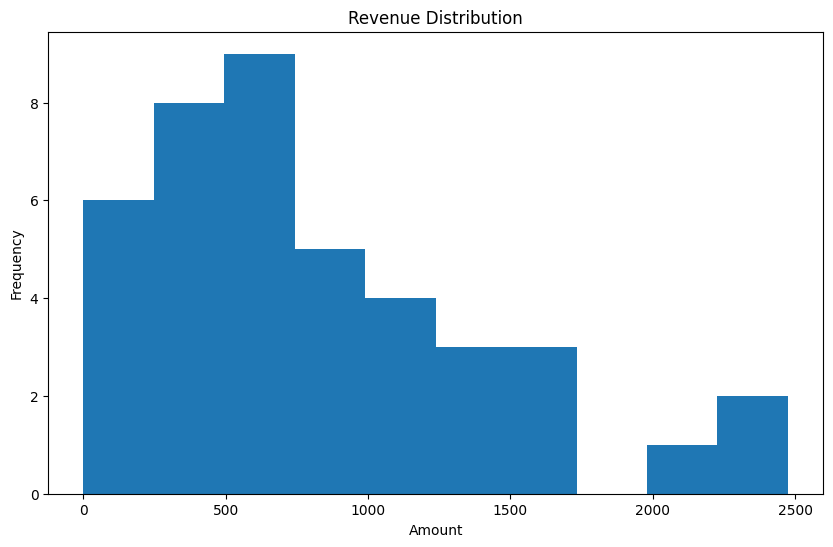

In [ ]:
# Создание гистограммы распределения выручки
fig, ax = plt.subplots(figsize=(10, 6)) # создание полотна
ax.hist(data['revenue'], bins=10) # определение признака и количества диапазонов (условно 5 ценовых диапазонов по 500)
ax.set_xlabel('Amount') # подпись оси Х
ax.set_ylabel('Frequency') # подпись оси Y
ax.set_title('Revenue Distribution') # заголовок графика
plt.savefig('figures/hist.png')

In [ ]:
# Из гистограммы можно сделать вывод, что преимущественно в датасете представлена выручка в диапазоне от 0 до примерно 750
# После этой цифры частота более высокой выручки падает, даже образуя пробел в гистограмме
# Это свидетельствует о более частом получении малой выручки в противовес редким показателям максимальной выручки среди пользователей 